In [1]:
%pip install gym-anytrading
import gym
import gym_anytrading
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
df = pd.read_csv('NVIDIA_Stock.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,05/30/2023,405.95,419.38,399.49,401.11,"92,340,109"
1,05/26/2023,378.90,391.70,375.50,389.46,"71,439,680"
2,05/25/2023,385.23,394.80,366.35,379.80,"154,391,109"
3,05/24/2023,302.10,306.07,298.06,305.38,"72,141,852"
4,05/23/2023,310.00,312.88,306.31,306.88,"35,625,328"


In [46]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [47]:
df['Date'] = pd.to_datetime(df ['Date'])
df.set_index('Date', inplace=True)
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [48]:
df.sort_values('Date', ascending = True, inplace = True)
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",", "")))
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [49]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-05-31,189.80,192.00,183.50,186.72,66409953.0
2022-06-01,187.24,190.53,181.22,183.20,54451391.0
2022-06-02,182.92,196.19,181.98,195.92,64865578.0
2022-06-03,190.82,193.32,185.22,187.20,59877871.0
2022-06-06,191.39,193.37,185.64,187.86,42240621.0


In [20]:
env = gym.make('stocks-v0', df = df, frame_bound = (10, 190), window_size = 10)  

c:\Users\pavle\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (10, 2)
  logger.warn(


c:\Users\pavle\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
c:\Users\pavle\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\utils\passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
c:\Users\pavle\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\utils\passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
c:\Users\pavle\AppData\Local\Programs\Python\Python

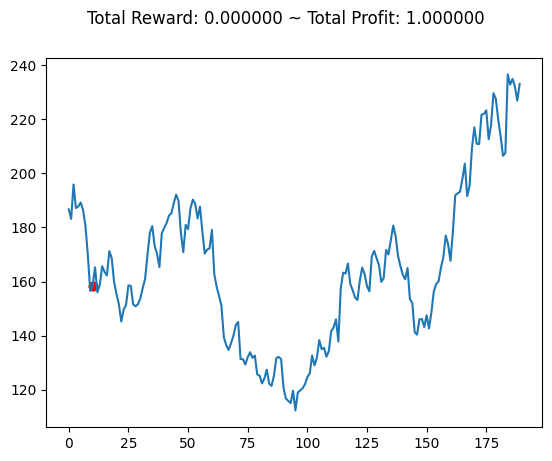

In [21]:
env.reset()
env.render()

# Random Trading

info: {'total_reward': 83.77000000000004, 'total_profit': 0.7058663137489352, 'position': 0}


c:\Users\pavle\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\utils\passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


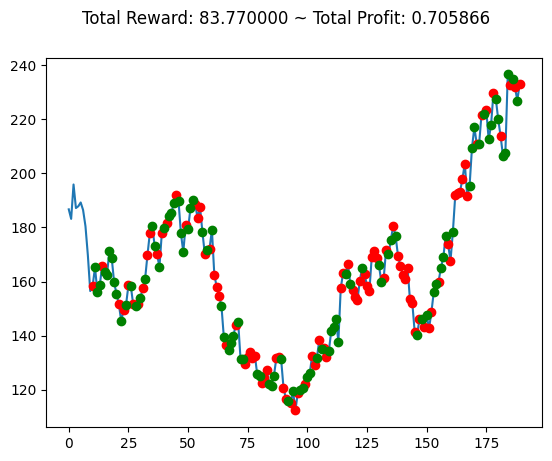

In [10]:
obs = env.reset()
while True:
  action = env.action_space.sample()
  observation, reward, done, info = env.step(action)
  if done:
    print(f"info: {info}")
    break
plt.cla()
env.render_all()
plt.show()

In [11]:
print("max_possible_profit:", env.max_possible_profit())

max_possible_profit: 16.872376365128066


# Building RL Network's

In [12]:
env.action_space

Discrete(2)

In [13]:
obs_space = env.observation_space.shape[0]
act_space = env.action_space.n
print(obs_space, act_space)

10 2


In [6]:
%pip install git+https://github.com/DLR-RM/stable-baselines3

  Cloning https://github.com/DLR-RM/stable-baselines3 to c:\users\pavle\appdata\local\temp\pip-req-build-x06swhvd
  Resolved https://github.com/DLR-RM/stable-baselines3 to commit ba77dd7c6180c0ec9a47dfa98291c2103e6750df
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for stable-baselines3: filename=stable_baselines3-2.1.0a3-py3-none-any.whl size=179808 sha256=8f7f65c5f3f2f1181cbf9c1fea50f2a9163aa3fee790da493132981a4ac17ac1
  Stored in directory: C:\Users\pavle\AppData\Local\Temp\pip-ephem-wheel-cache-gvjbr0bn\wheels\17\9c\c7\7e4f0c247d9fcdf3b7bdc5606f9a7f691507cc2a068d1509d2
Successfully built stable-baselines3
  Attempting uninstall: stable-baselines3
    Found existing installation: stable-b

  Running command git clone --filter=blob:none --quiet https://github.com/DLR-RM/stable-baselines3 'C:\Users\pavle\AppData\Local\Temp\pip-req-build-x06swhvd'

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import DQN
from stable_baselines3 import A2C
from stable_baselines3 import PPO
%pip install shimmy>=0.2.1
%pip install finta
from gym_anytrading.envs import StocksEnv
from finta import TA

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Custom Indicators

In [50]:
df["RSI"] = TA.RSI(df)
df["SMA"] = TA.SMA(df, 10)
df["OBV"] = TA.OBV(df)

In [51]:
df.fillna(0, inplace  = True)

In [52]:
df.head(20)

,Open,High,Low,Close,Volume,RSI,SMA,OBV
Date,,,,,,,,
2022-05-31,189.80,192.00,183.50,186.72,66409953.0,0.000000,0.000,0.0
2022-06-01,187.24,190.53,181.22,183.20,54451391.0,0.000000,0.000,-54451391.0
2022-06-02,182.92,196.19,181.98,195.92,64865578.0,79.556826,0.000,10414187.0
2022-06-03,190.82,193.32,185.22,187.20,59877871.0,50.119505,0.000,-49463684.0
2022-06-06,191.39,193.37,185.64,187.86,42240621.0,51.579862,0.000,-7223063.0
2022-06-07,184.72,190.00,181.88,189.26,38891406.0,54.615203,0.000,31668343.0
2022-06-08,187.99,191.80,185.35,186.48,36325246.0,48.159221,0.000,-4656903.0
2022-06-09,184.81,189.33,180.41,180.48,39557379.0,37.779305,0.000,-44214282.0
2022-06-10,176.00,176.97,168.69,169.74,46564969.0,26.690066,0.000,-90779251.0


In [53]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','RSI', 'SMA', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [54]:
class MyCustomEnv(StocksEnv):
  _process_data = add_signals

#should have had 
#env2 = MyCustomEnv(df = df, window_size = 10, frame_bound = (19,140)) to take into account the bad values of SMA
#as of now have not retrained with this taken into account training takes too long
env2 = MyCustomEnv(df = df, window_size = 10, frame_bound = (10,140))

In [55]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])


c:\Users\pavle\AppData\Local\Programs\Python\Python39\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [ ]:
env2.signal_features

In [23]:
df.head(20)

,Open,High,Low,Close,Volume,RSI,SMA,OBV
Date,,,,,,,,
2022-05-31,189.80,192.00,183.50,186.72,66409953.0,0.000000,0.000,0.0
2022-06-01,187.24,190.53,181.22,183.20,54451391.0,0.000000,0.000,-54451391.0
2022-06-02,182.92,196.19,181.98,195.92,64865578.0,79.556826,0.000,10414187.0
2022-06-03,190.82,193.32,185.22,187.20,59877871.0,50.119505,0.000,-49463684.0
2022-06-06,191.39,193.37,185.64,187.86,42240621.0,51.579862,0.000,-7223063.0
2022-06-07,184.72,190.00,181.88,189.26,38891406.0,54.615203,0.000,31668343.0
2022-06-08,187.99,191.80,185.35,186.48,36325246.0,48.159221,0.000,-4656903.0
2022-06-09,184.81,189.33,180.41,180.48,39557379.0,37.779305,0.000,-44214282.0
2022-06-10,176.00,176.97,168.69,169.74,46564969.0,26.690066,0.000,-90779251.0


# DQN


In [24]:
model = DQN("MlpPolicy", env, verbose=1, learning_rate = 0.0002, learning_starts=950, gamma = 0.95)

Using cpu device


In [ ]:
model.learn(total_timesteps=10000000)

In [26]:
model.save("DQN_Trading")  

# A2C

In [ ]:
model2 = A2C("MlpPolicy", env, verbose=1)
model2.learn(total_timesteps=1000000)

In [ ]:
model2.save("A2C_Trading")

# Comparison

DQN

In [56]:
env = MyCustomEnv(df = df, frame_bound = (150,200), window_size = 10)  

In [30]:
obs = env.reset()
model = DQN.load("DQN_Trading")
while True:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 58.77000000000001, 'total_profit': 1.253547230295682, 'position': 1}


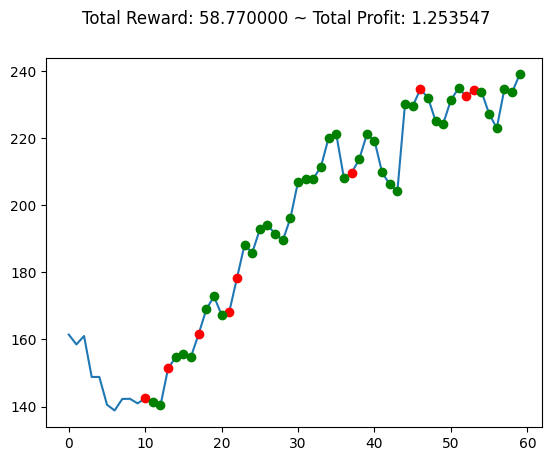

In [31]:
plt.cla()
env.render_all()
plt.show()


In [57]:
SMA_VALUES = df['SMA'].values
SMA_VALUES = SMA_VALUES[150:211]

#OBV_VALUES = df['OBV'].values
#OBV_VALUES = OBV_VALUES[150:211]

RSI_VALUES = df['RSI'].values
RSI_VALUES = RSI_VALUES[150:211]

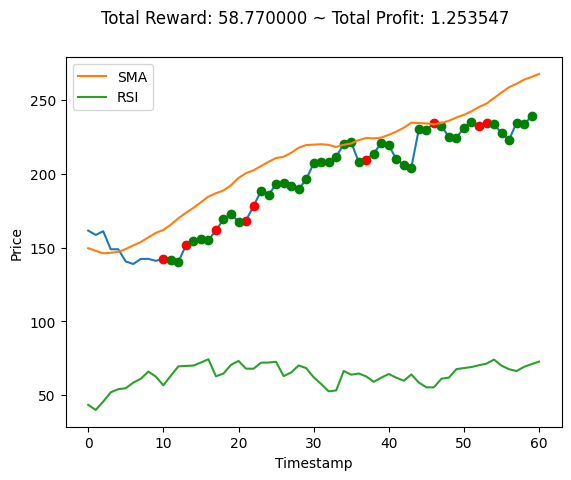

In [33]:
env.render_all()
fig, ax = plt.gcf(), plt.gca()

# Extract the original x-axis limits
x_start, x_end = ax.get_xlim()

# Calculate the range for the custom indicator
range_start = max(0, int(x_start))
range_end = min(len(SMA_VALUES), int(x_end))

# Create the range of x-axis values for the custom indicator
timestamps = range(range_start, range_end)

# Extract the corresponding custom indicator values

# Plot the custom indicator overlay
plt.plot(timestamps, SMA_VALUES, label='SMA')
plt.plot(timestamps, RSI_VALUES, label='RSI')
#plt.plot(timestamps, OBV_VALUES, label='OBV')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()

plt.show()

A2C

In [130]:
env = MyCustomEnv(df = df, frame_bound = (150, 200), window_size = 10)  
obs = env.reset()
model2 = A2C.load("A2C_Trading")
while True:
    obs = obs[np.newaxis, ...]
    action,_ = model2.predict(obs)
    obs, rewards, done, info = env.step(action)

    if done:
        print("info", info)
        break

info {'total_reward': 130.68, 'total_profit': 1.6820419299082325, 'position': 0}


A2C Results

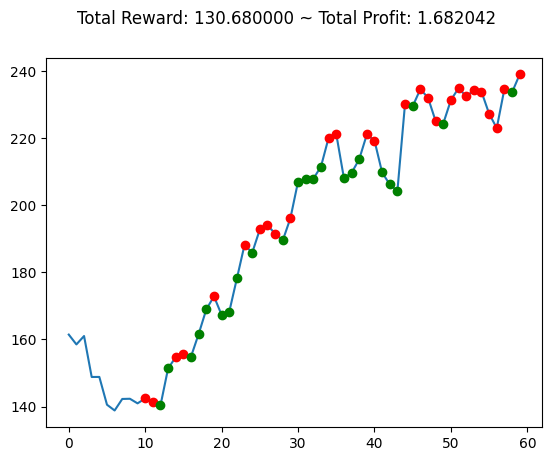

In [131]:
plt.cla()
env.render_all()
plt.show()

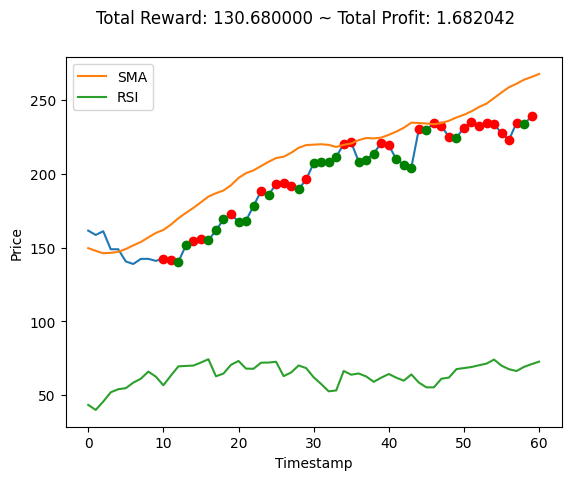

In [132]:
env.render_all()
fig, ax = plt.gcf(), plt.gca()

# Extract the original x-axis limits
x_start, x_end = ax.get_xlim()

# Calculate the range for the custom indicator
range_start = max(0, int(x_start))
range_end = min(len(SMA_VALUES), int(x_end))

# Create the range of x-axis values for the custom indicator
timestamps = range(range_start, range_end)

# Extract the corresponding custom indicator values

# Plot the custom indicator overlay
plt.plot(timestamps, SMA_VALUES, label='SMA')
plt.plot(timestamps, RSI_VALUES, label='RSI')
#plt.plot(timestamps, OBV_VALUES, label='OBV')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()

plt.show()

Finding Sharpe Ratio For Both Algorithms

Chose Risk Free Rate as 1 month Treasury Rate from this link on May 30th, 2023: https://ycharts.com/indicators/1_month_treasury_rate

Sharpe Ratio calculation from this link: https://ycharts.com/indicators/1_month_treasury_rate

In [60]:
risk_free_rate = 5.31
closing_prices = df['Close'].values
closing_prices = closing_prices[150:211]

#DQN
DQN_Return = 30
DQN_STD = np.std(closing_prices)
DQN_SHARPE = round((DQN_Return - risk_free_rate) / DQN_STD, 2)

#A2C
A2C_Return = 70
A2C_STD = np.std(closing_prices)
A2C_SHARPE = round((A2C_Return - risk_free_rate) / A2C_STD, 2)


#Results

print(f'The Sharpe Ratio over a 50 day period for DQN and A2C is {DQN_SHARPE} and {A2C_SHARPE} respectively')

The Sharpe Ratio over a 50 day period for DQN and A2C is 0.7 and 1.83 respectively
